## Data Source

### Climate 100 GHG Emissions
https://wikirate.org/Climate_100_GHG_Emissions

- Data quality?


## Load data from csv

In [3]:
file_name = "../data/WikiRate-2024_04_07_165420-Climate_100_GHG_Emissions+Answer-extended.csv"

In [4]:
import pandas as pd

In [10]:
carbon_data_frame = pd.read_csv(file_name, header=4) # as the top rows are comments, headers and csv are starting in the 5th row (index 4)

In [16]:
carbon_data_frame.head(3)

,Answer Page,Metric,Company,Year,Value,Source Page,Answer ID,Original Source,Source Count,Comments
0,https://wikirate.org/~15558672,Global Reporting Initiative+Indirect greenhous...,Hitachi Ltd.,2022,268.75,https://wikirate.org/~15558046,15558672.0,NaN,1.0,"Pg62- ""Indirect emissions from the production ..."
1,https://wikirate.org/~15354645,Global Reporting Initiative+Indirect greenhous...,Lockheed Martin,2022,508459,https://wikirate.org/~15354635,15354645.0,NaN,1.0,"pg. 44 ""SCOPE 2 EMISSIONS (2022) Gross Locatio..."
2,https://wikirate.org/~15354567,Global Reporting Initiative+Indirect greenhous...,Caterpillar,2022,800000,https://wikirate.org/~15354555,15354567.0,https://s7d2.scene7.com/is/content/Caterpillar...,1.0,"pg. 44 ""Scope 2 Location-based (million metric..."


## Sanity and data quality check

In [43]:
f"{len(carbon_data_frame)} rows in dataframe"

'1681 rows in dataframe'

In [15]:
carbon_data_frame.describe(include='all')

,Answer Page,Metric,Company,Year,Value,Source Page,Answer ID,Original Source,Source Count,Comments
count,1681,1681,1681,1681.000000,1681,1125,1.125000e+03,677,1125.000000,1065
unique,1681,3,100,NaN,1297,470,NaN,274,NaN,1065
top,https://wikirate.org/~15558672,Global Reporting Initiative+Direct greenhouse ...,Hitachi Ltd.,NaN,Unknown,https://wikirate.org/~5428665,NaN,https://en.wikipedia.org/wiki/Andeavor,NaN,"Pg62- ""Indirect emissions from the production ..."
freq,1,561,18,NaN,162,8,NaN,8,NaN,1
mean,NaN,NaN,NaN,2019.355146,NaN,NaN,1.020196e+07,NaN,1.051556,NaN
std,NaN,NaN,NaN,1.654175,NaN,NaN,4.141212e+06,NaN,0.247783,NaN
min,NaN,NaN,NaN,2017.000000,NaN,NaN,3.149318e+06,NaN,1.000000,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,5.398302e+06,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.265163e+07,NaN,1.000000,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.265399e+07,NaN,1.000000,NaN


In [201]:
# why has value no min/max?
carbon_data_frame.Value.dtype

dtype('O')

In [203]:
# Value is not a number(!)
carbon_data_frame.Value.value_counts()

Value
Unknown     162
400000        9
8000000       8
300000        7
11000000      5
           ... 
10846000      1
2389387       1
495800        1
2700000       1
31830000      1
Name: count, Length: 1297, dtype: int64

In [22]:
# How many unique companies (sanity check, should be 100)
len(carbon_data_frame.Company.unique())

100

In [39]:
carbon_data_frame.isna().sum()

Answer Page           0
Metric                0
Company               0
Year                  0
Value                 0
Source Page         556
Answer ID           556
Original Source    1004
Source Count        556
Comments            616
dtype: int64

In [36]:
# which companies are covered?
carbon_data_frame.Company.value_counts(normalize=False)

Company
Hitachi Ltd.                  18
Ford Motor Company            18
ThyssenKrupp Group            18
Lukoil                        18
Repsol                        18
                              ..
Engie                         15
Korea Electric Power          12
PTT Public Company Limited    12
Formosa Petrochemical         12
Shell plc                     12
Name: count, Length: 100, dtype: int64

In [27]:
# How manty metrics?
carbon_data_frame.Metric.unique()

array(['Global Reporting Initiative+Indirect greenhouse gas (GHG) emissions (Scope 2), GRI 305-2 (formerly G4-EN16-a)',
       'Commons+Greenhouse Gas Emissions Scope 1 and 2 combined',
       'Global Reporting Initiative+Direct greenhouse gas (GHG) emissions (Scope 1), GRI 305-1-a (formerly G4-EN15-a)'],
      dtype=object)

In [33]:
# reports per metric?
for metric in carbon_data_frame.Metric.unique().tolist():
    print("Metric:", metric, "Reports:", carbon_data_frame[carbon_data_frame.Metric==metric]["Answer ID"].count(), "\n")

Metric: Global Reporting Initiative+Indirect greenhouse gas (GHG) emissions (Scope 2), GRI 305-2 (formerly G4-EN16-a) Reports: 560 

Metric: Commons+Greenhouse Gas Emissions Scope 1 and 2 combined Reports: 4 

Metric: Global Reporting Initiative+Direct greenhouse gas (GHG) emissions (Scope 1), GRI 305-1-a (formerly G4-EN15-a) Reports: 561 



In [26]:
# which years are covered?
carbon_data_frame.Year.min(), carbon_data_frame.Year.max()

(2017, 2022)

## Check if we have enough a for selected metric (Scope 1 Emissions)

In [146]:
# We take metric "Global Reporting Initiative+Direct greenhouse gas (GHG) emissions (Scope 1), GRI 305-1-a (formerly G4-EN15-a)"
selected_metric = "Global Reporting Initiative+Direct greenhouse gas (GHG) emissions (Scope 1), GRI 305-1-a (formerly G4-EN15-a)"

In [147]:
carbon_data_frame_selected = carbon_data_frame[carbon_data_frame.Metric == selected_metric]
len(carbon_data_frame_selected)

561

In [170]:
len(carbon_data_frame_selected.Company.unique())

99

In [148]:
carbon_data_frame_selected.head()

,Answer Page,Metric,Company,Year,Value,Source Page,Answer ID,Original Source,Source Count,Comments
121,https://wikirate.org/~15327033,Global Reporting Initiative+Direct greenhouse ...,Procter & Gamble Co.,2022,2160,https://wikirate.org/~15327027,15327033.0,NaN,1.0,"pg. 23 ""Scope 1 — Direct GHG Emissions (metric..."
122,https://wikirate.org/~15327197,Global Reporting Initiative+Direct greenhouse ...,Fiat Chrysler Automobiles (FCA),2022,1500000,https://wikirate.org/~15327189,15327197.0,https://www.stellantis.com/content/dam/stellan...,1.0,"pg. 67 ""Global Stellantis carbon footprint Sco..."
123,https://wikirate.org/~15326995,Global Reporting Initiative+Direct greenhouse ...,Ford Motor Company,2022,1250000,https://wikirate.org/~15326989,15326995.0,NaN,1.0,"pg. 102 ""Worldwide Operations GHG Emissions (m..."
124,https://wikirate.org/~15065471,Global Reporting Initiative+Direct greenhouse ...,BP plc.,2022,30.4,https://wikirate.org/~15065462,15065471.0,NaN,1.0,p. 22 Diana Čechová[https://wikirate.org/Diana...
125,https://wikirate.org/~14557230,Global Reporting Initiative+Direct greenhouse ...,BHP Billiton,2022,9200000,https://wikirate.org/~14557205,14557230.0,NaN,1.0,p. 49 Lucia Ixtacuy[https://wikirate.org/Lucia...


<Axes: xlabel='Year'>

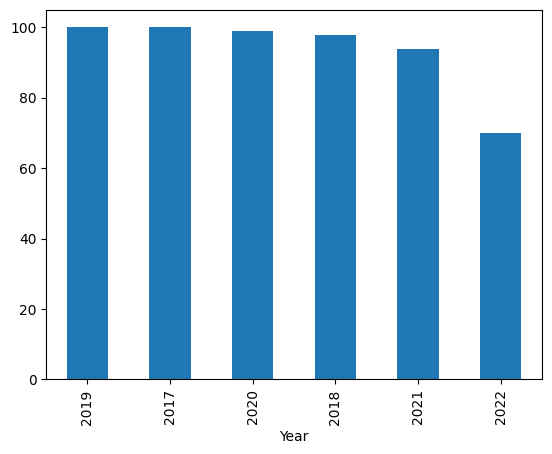

In [149]:
carbon_data_frame_selected.Year.value_counts().plot(kind="bar")

In [150]:
carbon_data_frame_selected.Value.value_counts()

Value
Unknown     42
11100000     3
24800000     3
21400000     3
740000       3
            ..
13300000     1
920000       1
63           1
74414000     1
30160000     1
Name: count, Length: 488, dtype: int64

In [151]:
carbon_data_frame_selected.Value.dtype

dtype('O')

In [152]:
# remove rows with unknown
carbon_data_frame_selected = carbon_data_frame_selected[carbon_data_frame_selected.Value!="Unknown"]

In [153]:
carbon_data_frame_selected.Value = carbon_data_frame_selected.Value.astype(float)

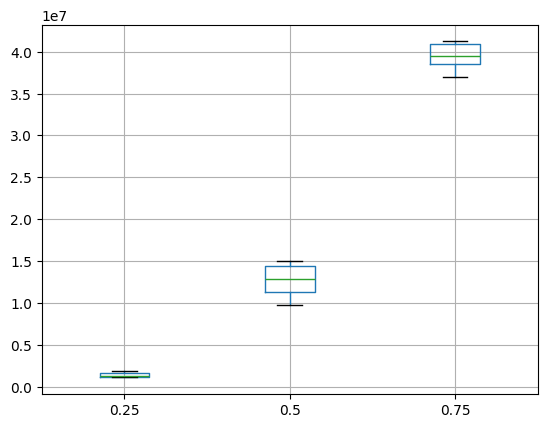

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Year' and 'Value' columns

# Group by 'Year' and calculate the percentiles
percentiles_per_year = carbon_data_frame_selected.groupby('Year')['Value'].quantile([0.25, 0.5, 0.75])

# Unstack the multi-index and plot
ax = percentiles_per_year.unstack().boxplot()
# Prevent scientific notation on y-axis
ax.ticklabel_format(style='sci', axis='y')

plt.grid(True)

plt.show()

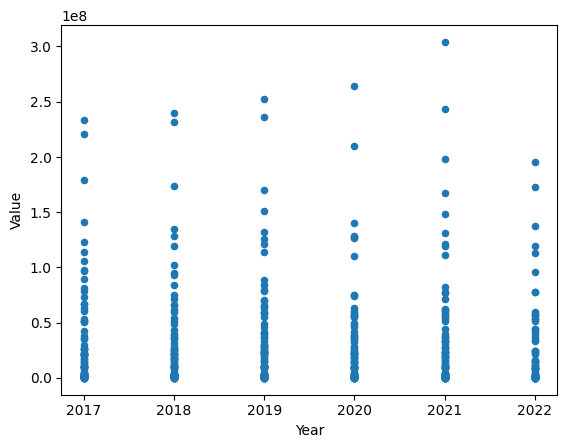

In [155]:
# distribution of values over years
ax = carbon_data_frame_selected.plot(kind='scatter', x="Year", y="Value")

# Prevent scientific notation on y-axis
ax.ticklabel_format(style='sci', axis='y')

plt.show()

<Axes: title={'center': 'Number of year records per company'}, xlabel='Number of years recorded', ylabel='Number of Comapnies'>

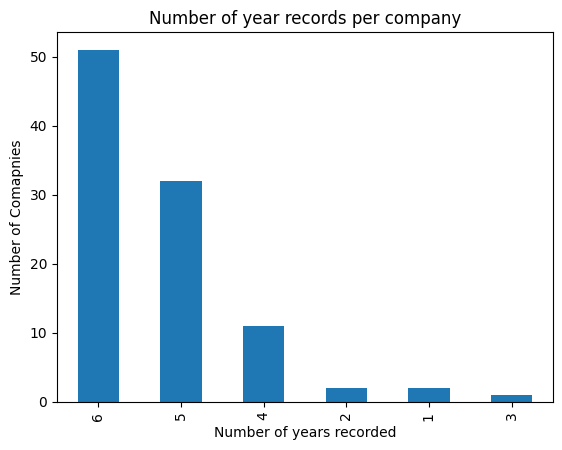

In [185]:
# how many timestamps per company are available?
carbon_data_frame_selected.groupby("Company").Year.count()\
.value_counts().plot(kind="bar", title="Number of year records per company", ylabel="Number of Comapnies", xlabel="Number of years recorded")

In [199]:
# How many companies have at least 3 values on diffferent timestamps recorded?
counts = carbon_data_frame_selected.groupby("Company").Year.count()
len(counts[counts>=3])

95

## Conclusion

1) Data holds values of CO2 emissions per company, on different scopes (1 vs 263)
2) Value columns needs to be transformed/normalized
3) Not all companies have records for all years
4) Additional columns are not needed to draw trends

## Excercise
1) Use the data from https://wikirate.org/Global_Reporting_Initiative+Total_Waste_Generated_GRI_306_2_formerly_G4_EN23_a to do the same analysis. The topic is generated waste.
    
    Question:
        For the same companies shown here, how did their waste change in the same time range (2017 to 2023)?


2) Use the data from hhttps://wikirate.org/Global_Reporting_Initiative+Fuel_consumption_from_non_renewable_sources_GRI_302_1_a_formerly_G4_EN3_a to do the same analysis. The topic is fuel consumption. Check how may companies overlap in these 3 datasets.

3) Analyze the data from https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators in regards to germany, and how our efforts compare to e.g. France.

4) Use https://pandas.pydata.org/docs/user_guide/scale.html and this dataset https://www.kaggle.com/datasets/peopledatalabssf/free-7-million-company-dataset to create a new csv based on the companies from the first df, that contains: Company Name, Countryy, industry